# Module 1 Code Challenge Review 

_May 20, 2020_ 

## Code Challenge Reviews

#### 1. Pandas Operations

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [2]:
# import a datafile from a directory
# read in 'auto-mpg.csv' from the data dir
col_names = [i for i in range(9)]
df = pd.read_csv('data/auto-mpg.csv', 
                 sep='\s+',
                 names=col_names)
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:
# this is loading an example dataset which is stored in the seaborn library
# we'll use this dataset below
# run this cell

df = sns.load_dataset('iris')

In [4]:
# examine the first few rows of it
df.head()




,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# examine the dimensions of it


df.shape


(150, 5)

In [6]:
# check to see if you have missing values


df.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
# let's add some missing values
df.iloc[2,1:3] = np.nan

#now check again for nulls

df.isnull().sum()



sepal_length    0
sepal_width     1
petal_length    1
petal_width     0
species         0
dtype: int64

In [8]:
# drop the row with those nulls
df.dropna(axis=0, inplace=True)

In [9]:
# check again for nulls

df.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
# create a new column, that is 10 times the sepal length, called sepal_length_10

df['sepal_length_10'] = df['sepal_length'].apply(lambda x: x * 10)


df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10
0,5.1,3.5,1.4,0.2,setosa,51.0
1,4.9,3.0,1.4,0.2,setosa,49.0
3,4.6,3.1,1.5,0.2,setosa,46.0
4,5.0,3.6,1.4,0.2,setosa,50.0
5,5.4,3.9,1.7,0.4,setosa,54.0


In [11]:
# create another column called sepal_length_10_2, again 10 times sepal length
# but using a different method to create the column

df['sepal_length_10_2'] = [x*10 for x in df['sepal_length']]

df.head()




,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10,sepal_length_10_2
0,5.1,3.5,1.4,0.2,setosa,51.0,51.0
1,4.9,3.0,1.4,0.2,setosa,49.0,49.0
3,4.6,3.1,1.5,0.2,setosa,46.0,46.0
4,5.0,3.6,1.4,0.2,setosa,50.0,50.0
5,5.4,3.9,1.7,0.4,setosa,54.0,54.0


#### 2. Data Visualization

what is the difference between a bar chart, a histogram, and a scatterplot?





A bar chart allows us to compare categorical variables over continuous scalars. A histogram helps us understand the frequency of values for a variable. A scatterplot helps us understand the relationship between two continuous variables.

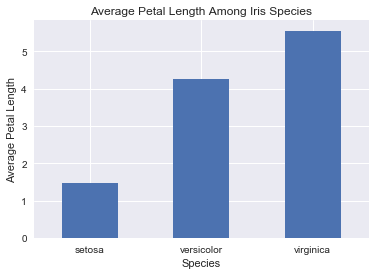

In [24]:
# plot the average pedal length for each species of iris 
plt.plot()

df.groupby('species').petal_length.mean().plot(kind='bar')
plt.xticks(rotation='horizontal')
plt.ylabel('Average Petal Length')
plt.xlabel('Species')
plt.title('Average Petal Length Among Iris Species')
plt.show()


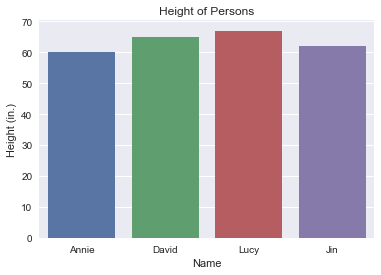

In [26]:
#create a bar chart using the following dummy data
persons = ['Annie', 'David', 'Lucy','Jin']
height = [60, 65, 67, 62]

fig, ax = plt.subplots()

sns.barplot(x = persons,
           y = height)
ax.set(xlabel = 'Name',
      ylabel = 'Height (in.)',
      title = 'Height of Persons')
plt.show()

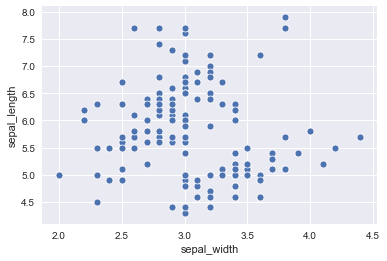

In [28]:
# create a scatterplot of sepal length vs sepal width
fig, ax = plt.subplots()
sns.scatterplot(x = df.sepal_width,
                y = df.sepal_length)

plt.show()



In [43]:
#check the correlations among all the variables in the frame
df.corr()


,sepal_length,sepal_width,petal_length,petal_width,sepal_length_10,sepal_length_10_2
sepal_length,1.000000,-0.115303,0.870066,0.815701,1.000000,1.000000
sepal_width,-0.115303,1.000000,-0.428329,-0.365487,-0.115303,-0.115303
petal_length,0.870066,-0.428329,1.000000,0.962424,0.870066,0.870066
petal_width,0.815701,-0.365487,0.962424,1.000000,0.815701,0.815701
sepal_length_10,1.000000,-0.115303,0.870066,0.815701,1.000000,1.000000
sepal_length_10_2,1.000000,-0.115303,0.870066,0.815701,1.000000,1.000000


Describe three relationships from the scatterplot / correlations you made





## Part III. Statistics 

In [33]:
# calculate the mean and median value for sepal length 
print(f'Sepal length: Mean is {df.sepal_length.mean()} and Median is {df.sepal_length.median()}')
print(f'Sepal width: Mean is {df.sepal_width.mean()} and Median is {df.sepal_width.median()}')




Sepal length: Mean is 5.851006711409395 and Median is 5.8
Sepal wength: Mean is 3.0563758389261744 and Median is 3.0


In [32]:
# what can you say about the distribution of sepal length and sepal width based on this distribution?

# The distribution for sepal length seems to be a normal  and evenly distributed. However, the fact that the mean is slightly higher than the median means that there are slightly 
# more flowers with a longer sepal length. The same analysis applies for width.


In [34]:
# which flower has the longest pedal? what is the species of that flower

df[df.petal_length == df.petal_length.max()] #virginica



,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_10,sepal_length_10_2
118,7.7,2.6,6.9,2.3,virginica,77.0,77.0


## Part IV. Python Data Structure 

In [36]:
Pets = {
    'Ginger': [{
        'age': 5,
        'type': 'Pitbull',
        'attribute': ['Playful','Cheery','Hyper']
    }],
    'Chloe': [{
        'age': 1,
        'type': 'Maine Coon',
        'teams': ['Alert','Independent','Playful']
    }],
    'Chuck Norris': [{
        'age': 8,
        'type': 'Parrot',
        'teams': ['Talkative','Independent','Cheery']
    }],
    'Joe Rogan': [{
        'age': 2,
        'type': 'Labrador',
        'teams': ['Hyper','Playful','Energetic']
    }]
}

In [37]:
# create a list of names containing all pets' names w/ a for-loop
names = []
for key in Pets:
    names.append(key)
names



['Ginger', 'Chloe', 'Chuck Norris', 'Joe Rogan']

In [47]:
# same thing but a list comprehension
names = [key for key in Pets]
names


['Ginger', 'Chloe', 'Chuck Norris', 'Joe Rogan']

In [62]:
# loop through the collection (however you like) to create a list that contain all pets' types
# desired output ['Pitbull','Maine Coon','Parrot','Labrador']

types_list = [Pets[t][0]['type'] for t in Pets]

# print(type(Pets['Ginger'][0]['type']))
# print(type(Pets['Ginger'][0].get('type')))

types_list

['Pitbull', 'Maine Coon', 'Parrot', 'Labrador']

In [66]:
# create a function that returns the names of pets who is older than x years old

# the function should take in as parameters: 
#     dictionary containing all pet information, 
#     an integer indicating age you want to compare

            
def names_age(d, a):
    older_pets = [name for name in d if d[name][0]['age'] > a]
    return older_pets

names_age(Pets, 2)
    
    
    

['Ginger', 'Chuck Norris']